<a href="https://colab.research.google.com/github/Avinda04/UAS-AI/blob/main/Klasifikasi_obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

# Klasifikasi Obesitas menggunakan KNN
# Dibuat oleh:


In [17]:
!git clone https://github.com/Avinda04/UAS-AI.git

fatal: destination path 'UAS-AI' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL raw dari file dataset
dataset_file = "https://raw.githubusercontent.com/Avinda04/UAS-AI/main/Dataset/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)

In [ ]:
# Menampilkan 5 baris pertama dari dataset
print(data.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [ ]:
# Menampilkan informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None


In [ ]:
# Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'Duplikat: {duplicates}')

Duplikat: 0


In [ ]:
# Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'Nilai Null:\n{null_values}')

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [ ]:
# Menghapus duplikat
data = data.drop_duplicates()

In [ ]:
# Menghapus baris dengan nilai kosong
data = data.dropna()

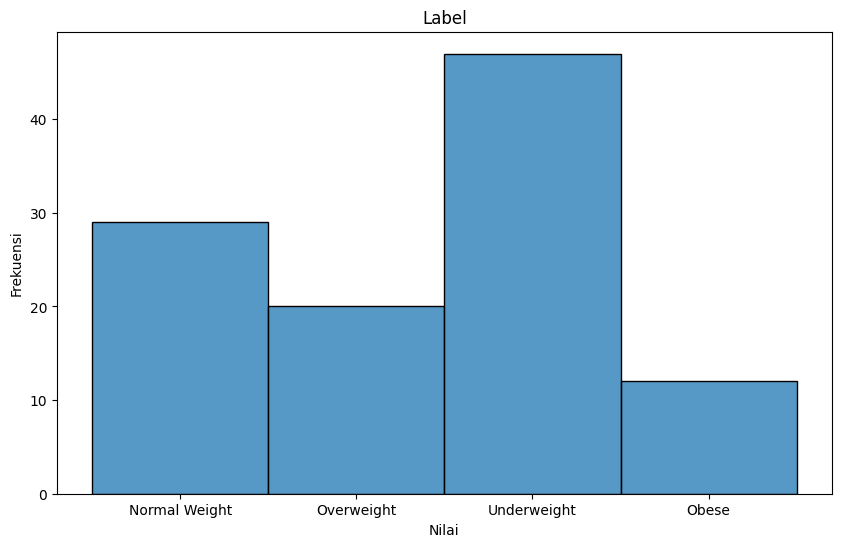

In [ ]:
# Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Label')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

*KKN* *ANALISIS*

5 Baris Pertama dari Dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Jumlah Duplikat: 0

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label

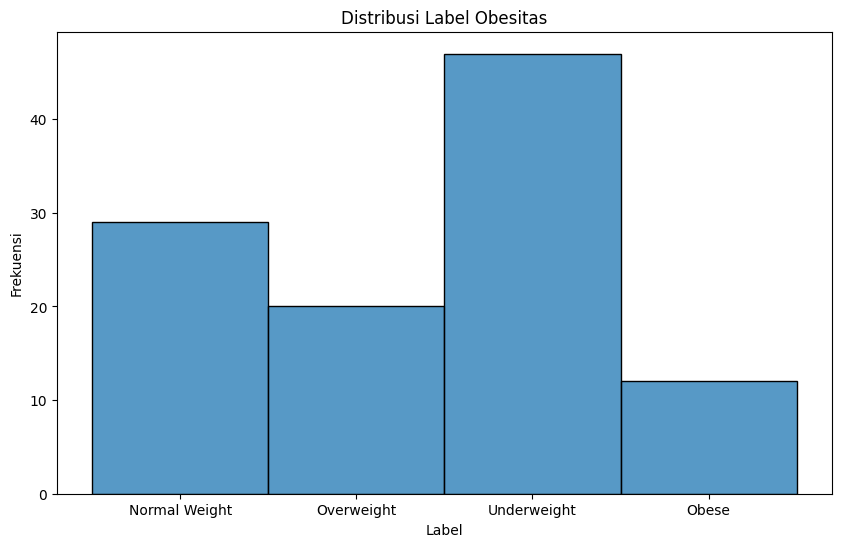

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Memuat Dataset
dataset_file = "https://raw.githubusercontent.com/Avinda04/UAS-AI/main/Dataset/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)

# 2. Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(data.head())

# 3. Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# 4. Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'\nJumlah Duplikat: {duplicates}')

# 5. Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'\nNilai Null:\n{null_values}')

# 6. Menghapus duplikat
data = data.drop_duplicates()

# 7. Menghapus baris dengan nilai kosong
data = data.dropna()

# 8. Mengubah variabel kategorikal 'Gender' menjadi variabel numerik
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# 9. Memisahkan fitur dan label
X = data.drop(columns=['ID', 'Label'])  # Menghapus kolom ID dan Label dari fitur
y = data['Label']  # Label adalah kolom 'Label'

# 10. Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the indices of the test set before transforming it.
test_indices = X_test.index

# 11. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 12. Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengubah n_neighbors sesuai kebutuhan

# 13. Melatih model
knn.fit(X_train, y_train)

# 14. Melakukan prediksi
y_pred = knn.predict(X_test)

# 15. Evaluasi model
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# 16. Mengambil ID dari data uji, now using the saved test index.
test_ids = data.loc[test_indices, 'ID']

# 17. Membuat DataFrame untuk hasil prediksi
results = pd.DataFrame({
    'ID': test_ids,
    'Label Aktual': y_test,
    'Label Prediksi': y_pred
})

# 18. Menampilkan tabel hasil
print("\nHasil Prediksi:")
print(results)

# 19. Jika ingin menyimpan hasil ke file CSV
results.to_csv('hasil_prediksi_knn.csv', index=False)

# 20. Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Distribusi Label Obesitas')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

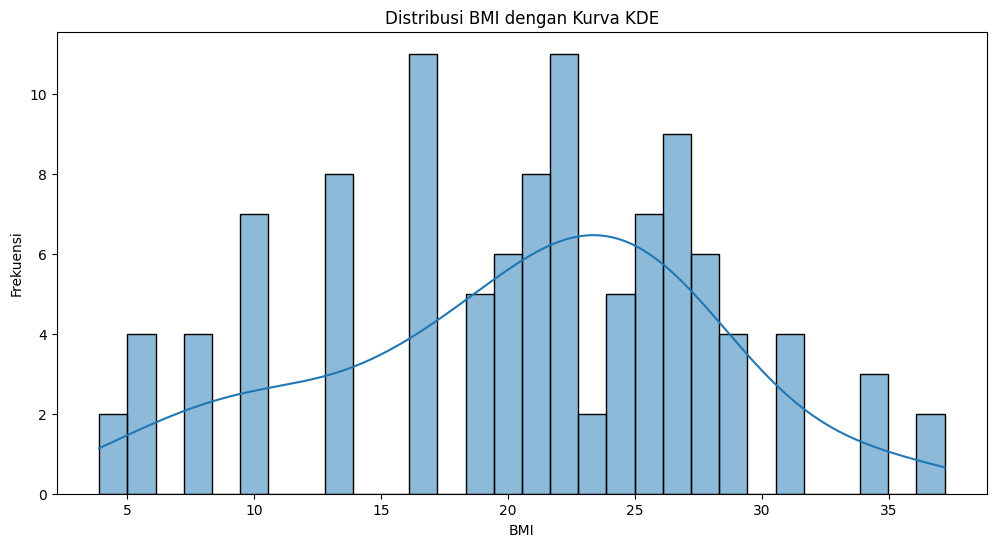

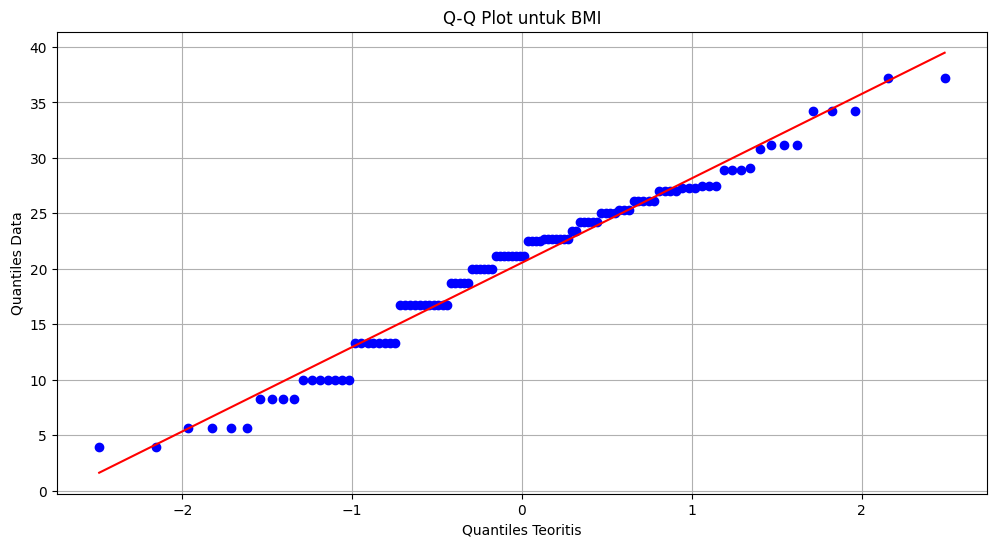

Shapiro-Wilk Test: Statistic=0.9739785341462815, p-value=0.032366522450285644
Data tidak mengikuti distribusi normal (menolak H0)


In [ ]:
# Import distriibusi normal
import scipy.stats as stats

# 1. Visualisasi Histogram dan Kurva KDE
plt.figure(figsize=(12, 6))
sns.histplot(data['BMI'], kde=True, bins=30)
plt.title('Distribusi BMI dengan Kurva KDE')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(data['BMI'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk BMI')
plt.xlabel('Quantiles Teoritis')
plt.ylabel('Quantiles Data')
plt.grid()
plt.show()

# 3. Uji Normalitas (Shapiro-Wilk)
shapiro_test = stats.shapiro(data['BMI'])
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Interpretasi hasil uji normalitas
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data mengikuti distribusi normal (gagal menolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (menolak H0)")

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
